HƯỚNG DẪN SUY DIỄN THỐNG KÊ BẰNG GÓI STATS CỦA THƯ VIỆN SCIPY

1. Các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats import weightstats

2. Thiết lập định dạng hình ảnh

In [ ]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

3. Tắt các cảnh báo của scipy

In [ ]:
warnings.filterwarnings('ignore')

4. Một số lưu ý khi kiểm định giả thuyết trong thống kê suy diễn
(1) Cỡ mẫu thường nhỏ ( n<30 ) để có ý nghĩa thống kê

(2) Các mẫu quan sát được (sample observations) phải được lựa chọn ngẫu nhiên từ quần thể

(3) Các đại lượng như trung bình mẫu (sample mean), độ lệch chuẩn của mẫu (standard deviation), phương sai mẫu (sample variance) được tính từ tập mẫu quan sát được.

(4) Giả định rằng quần thể được nghiên cứu lấy mẫu xấp xỉ với phân phối chuẩn.

5. Các bước thực hiện kiểm định giả thuyết (sử dụng kiểm định t)

Bước 1: Thực hiện các phép đo, hay thu thập dữ liệu quan sát

Bước 2: Phát biểu giả thuyết  H0  và giả thuyết thay thế  Ha 

Bước 3: Xác định mức  α  (hay khoảng tin cậy)

Bước 4: Lấy mẫu và tính toán các đại lượng thống kê của mẫu

Bước 5: Thực hiện kiểm định t (t-test)

Bước 6: Kết luận dựa vào kết quả kiểm định

KIỂM ĐỊNH GIẢ THUYẾT MỘT ĐUÔI

1. Kỹ thuật sinh dữ liệu ngẫu nhiên
Sinh các mẫu ngẫu nhiên lấy ra từ phân phối chuẩn bằng hàm random.normal() với các tham số:

- mean: giá trị trung bình của quần thể

- scale: độ lệch chuẩn của quần thể (không âm)

- size: kích thước mẫu

In [ ]:
#Sinh ngẫu nhiên 20 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 20
samples = np.random.normal(mean, std, N)

In [ ]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[0.94853478 0.90556217 0.97620082 1.04656206 1.05169064 1.00567734
 0.90586657 0.994      0.99820917 0.88286878]


In [ ]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.105143429553116
Min:  0.8223031924883331


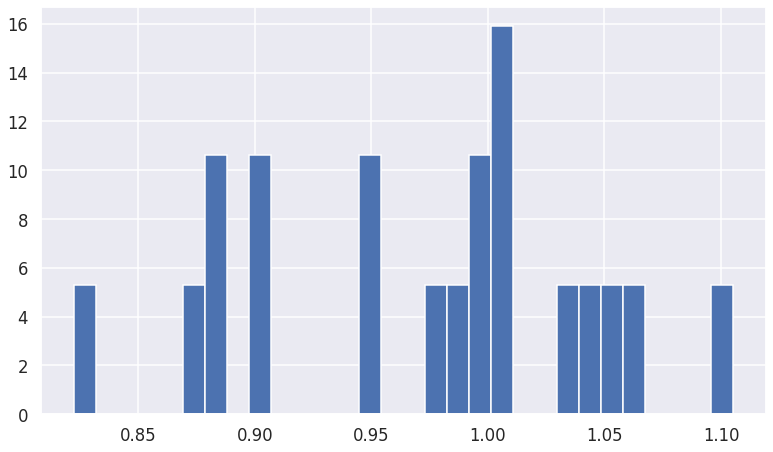

In [ ]:
#Vẽ histogram của mẫu vừa được sinh ngẫu nhiên
plt.hist(samples, 30, density=True)
plt.show()

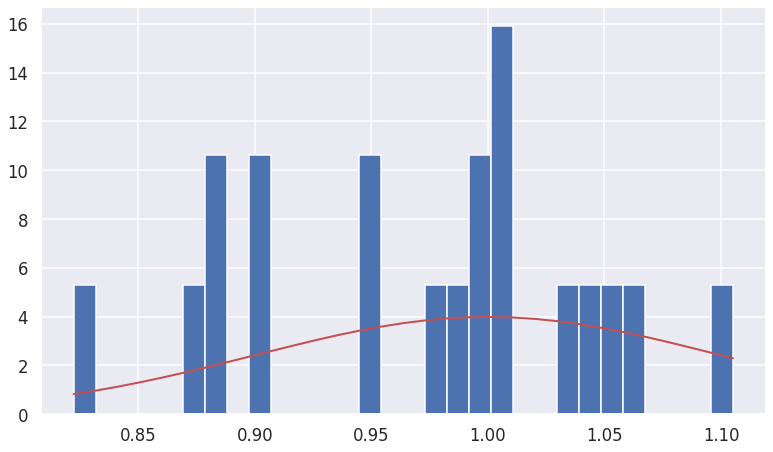

In [ ]:
#Vẽ đường phân phối chuẩn cùng với histogram
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

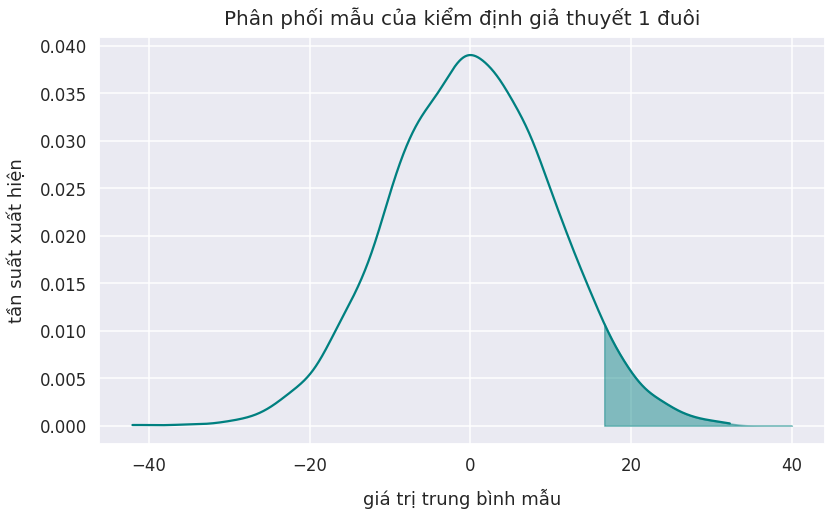

In [ ]:
#Sinh ngẫu nhiên 6000 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=6000)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 10000 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);

2. Hình minh họa các kiểm định 1-đuôi, 2-đuôi

In [ ]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [ ]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032937/Screenshot39.png", width=300, height=300)

In [ ]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)

3. Xây dựng một kiểm định t cụ thể với số liệu được sinh ngẫu nhiên theo phân phối chuẩn

Bài toán: Cân thử 15 con gà tây ở 1 trại chăn nuôi khi xuất chuồng ta tính
được $\overline{\rm x} = 3.62kg$. Cho biết σ = 0.1.
Giám đốc trại tuyên bố trọng lương trung bình của gà tây là 3, 5kg thì
có tin được không với mức ý nghĩa α =1%.

Xây dựng giả thuyết

$$H_{0}: \mu = 3.5kg$$

Giả thuyết thay thế: 

$$H_{a}: \mu \neq 3.5kg $$

Giải:

Với:
- sig = 0.01
- chỉ số t tương ứng = 2.58

Công thức:
$$Z = \frac{(\overline{\rm X} - \mu)}{(\sigma / \sqrt{n})}$$

Áp dụng với các giá trị nêu trên:
- $\overline{\rm x} = 3.62kg$
- $\mu = 3.5$
- $\sigma = 0.1$
- $n = 15$
- $\alpha = 0.01$

$$t = \frac{(3.62 - 3.5)}{(0.1 / \sqrt{15})} = 4.6$$  

Giá trị t = 4.6 > 2.58 nên có bằng chứng để bác bỏ giả thuyết $H_{0}$



Lập trình Python cho bài toán nêu trên

In [ ]:
#Sinh ngẫu nhiên một mẫu 15 phần tử có trung bình mẫu là 3.62, độ lệch chuẩn là 0.1
sample1 = np.random.normal(3.62, 0.1, 15)
print(sample1)

[3.40616891 3.53017836 3.63465022 3.66829373 3.82646641 3.6252796
 3.72385599 3.72466518 3.65804817 3.69050539 3.45520768 3.69893715
 3.71419658 3.58840994 3.78004021]


In [ ]:
#Xác định các thông số
null_mean = 3.5
alpha = 0.01

In [ ]:
#Kiểm định t
import statsmodels
ttest, p_value = stats.ttest_1samp(sample1, null_mean)
print('t = ', ttest, '; p = ', p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  5.011099258140954 ; p =  0.0001905540286073038
Có bằng chứng để bác bỏ giả thuyết H0


Kiểm định giả thuyết 2-đuôi

Một cách tổng quát, giả sử chúng ta có 2 quần thể độc lập và tuân theo phân phối chuẩn. Lấy ra 2 mẫu ngẫu nhiên tử 2 quần thể này.

Xây dựng giả thuyết:

$$H_{0}: \mu_{1} = \mu_{2}$$

Giả thuyết thay thế:

$$H_{a}: \mu_{1} \neq \mu_{2}$$

Thực hiện kiểm định t và so sánh với giá trị $t_{\frac{\alpha}{2}}$ để đi đến kết luận cuối cùng.

Bài Toán: Đo đường kính 20 trục máy do máy I sản xuất và 22 trục máy do máy II sản xuất ta tính được $\overline{\rm x_{1}} =251$, 7; $s_{1}$ = 52, 853 và $\overline{\rm x_{2}} =249.8$; $s_{1}$ = 56.2. Mức ý nghĩa 1%.

Kiểm định t 2 đuôi

In [ ]:
#Lập trình python minh họa
#Sinh ngẫu nhiên sample 1 có 20 phần tử với mean = 251, std có hiệu chỉnh = 52,853
samples_1 = np.random.normal(251, 52.853, 20)
print(samples_1)

[218.57717138 192.25825423 176.28280815 239.46432919 250.78572066
 234.91582586 249.93303238 172.57533746 211.36866195 240.81351741
 282.83759425 306.04570637 264.47963776 259.9331666  231.39358403
 239.77119605 214.01489769 271.663066   334.990323   206.15130861]


In [ ]:
#Sinh ngẫu nhiên sample 2 có 22 phần tử với mean = 249.2 std = 56.2
samples_2 = np.random.normal(249.2, 56.2, 22)
print(samples_2)

[218.66988941 272.19188003 197.97607467 216.44856495 276.91029266
 376.03609687 242.06509365 292.40120534 271.17997969 261.11032906
 246.94321289 229.83515718 214.93021377 327.89073214 306.44888919
 282.42181511 160.29428916 277.77292878 217.35820346 276.72672081
 212.48458214 275.70791731]


In [ ]:
#Kiểm định giả thuyết
#T-test cho phương tiện của hai mẫu độc lập từ thống kê mô tả. Từ bài toán trên
alpha1 = 0.01
ttest_score, p_value = stats.ttest_ind_from_stats(mean1 = 251, mean2 = 249.2, std1 = 52.853, std2 = 56.2, nobs1 = 20, nobs2 = 22)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  0.10663439652131487 ; p =  0.9156120538802968
Chưa có bằng chứng để bác bỏ giả thuyết H0


In [ ]:
#Kiểm định giả thuyết:
#Tính toán kiểm tra T cho giá trị trung bình của hai mẫu điểm độc lập . 
alpha1 = 0.01
ttest_score1, p_value1 = stats.ttest_ind(samples_1, samples_2, axis=0, equal_var=True, nan_policy='propagate')
print('t_score = ', ttest_score1, '; p_value = ', p_value1)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t_score =  -1.2406211660093507 ; p_value =  0.2219733708369456
Chưa có bằng chứng để bác bỏ giả thuyết H0
